In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [254]:
# Read in data from Kaggle
gdp_o = pd.read_csv("gdp.csv")

# Create new df with columns of interest
gdp = gdp_o[['Country Name', '2020']].copy()

# Clean the data
gdp_c = gdp.drop([0, 1, 3, 7, 11, 36, 38, 49, 52, 61, 62, 63, 64, 65, 68, 73, 74, 78, 84, 95, 98, 102, 103, 104, 105, 107, 108, 110, 128, 135, 136, 139, 140, 142, 146, 147, 153, 156, 161, 172, 181, 183, 191, 197, 198, 204, 215, 217, 218, 225, 230, 231, 236, 238, 240, 241, 249, 255, 256, 259, 6, 69, 91, 137, 164, 193, 199, 212, 216, 227, 235, 254, 262, 134], axis = 0)
gdp_c = gdp_c.reset_index(drop = True)
gdp_c.sort_values(by=['Country Name'])
gdp_c = gdp_c.reset_index(drop = True)

# Create a df with country codes and gdp for visualization
gdp_code = gdp_o[['Code', '2020']].copy()

In [255]:
# Read in altered data from Kaggle
covid = pd.read_csv("covid data world corrected.csv")
covid

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,Afghanistan,178257,7676,161363.0,9218.0,4403,190,931702.0,23014.0,40483797
1,Albania,274236,3494,270378.0,364.0,95479,1216,1787376.0,622298.0,2872219
2,Algeria,265730,6874,178327.0,80529.0,5872,152,230861.0,5101.0,45256195
3,Angola,99194,1900,97149.0,145.0,2860,55,1499795.0,43247.0,34679470
4,Antigua and Barbuda,7523,135,7367.0,21.0,75708,1359,18901.0,190212.0,99368
5,Argentina,9056203,128268,8888514.0,39421.0,197166,2793,35657472.0,776311.0,45931949
6,Armenia,422691,8621,410365.0,3705.0,142173,2900,3003171.0,1010123.0,2973075
7,Australia,5194725,6644,4624577.0,563504.0,199605,255,67928121.0,2610106.0,26025040
8,Austria,4004069,16286,3819238.0,168545.0,440123,1790,179667360.0,19748829.0,9097621
9,Azerbaijan,792289,9703,782375.0,211.0,76911,942,6750860.0,655334.0,10301401


In [256]:
# FINDING THE NUMBER OF NANS IN TOTAL DEATHS
# CONCLUSION: 0 NANS

letsSee = covid['Total Deaths']             #taking a view of the column of street so we can work with it

k = 0
for row in letsSee:             #starting out the for loop to iterate thru the column
    try:
        float(row)           #if this line works, then that means it wasn't a str and we want to kick it out
        pass

    except ValueError:       #if it throws this error, then it means that it wasn't a float, and we want it to be a NaN
        letsSee.loc[k] = np.nan 
    
    k = k + 1
        
print('Number of NaNs in TOTAL DEATHS:', letsSee.isna().sum())

Number of NaNs in TOTAL DEATHS: 0


In [257]:
# FINDING THE NUMBER OF NANS IN TOTAL CASES
# CONCLUSION: 0 NANS

cases = covid['Total Cases']             #taking a view of the column of street so we can work with it 


k = 0
for row in cases:             #starting out the for loop to iterate thru the column
    try:
        float(row)           #if this line works, then that means it wasn't a str and we want to kick it out
        pass

    except ValueError:       #if it throws this error, then it means that it wasn't a float, and we want it to be a NaN
        cases.loc[k] = np.nan 
    
    k = k + 1
    
print('Number of NaNs in TOTAL CASES:', cases.isna().sum())

Number of NaNs in TOTAL CASES: 0


In [258]:
# FINDING THE NUMBER OF NANS IN POPULATION
# CONCLUSION: 0 NANS

pops = covid['Population']             

k = 0
for row in pops:             #starting out the for loop to iterate thru the column
    try:
        float(row)           #if this line works, then that means it wasn't a str and we want to kick it out
        pass

    except ValueError:       #if it throws this error, then it means that it wasn't a float, and we want it to be a NaN
        pops.loc[k] = np.nan 
    
    k = k + 1
        
print('Number of NaNs in POPULATION:', pops.isna().sum())

Number of NaNs in POPULATION: 0


In [259]:
# Create dfs
casesdf = pd.DataFrame(cases)
popdf = pd.DataFrame(pops)
deathsdf = pd.DataFrame(letsSee)

# Merge covid data with gdp data
merged = pd.merge(covid, gdp_c, how = 'outer', on = 'Country Name', left_index = False, right_index = False, 
                 sort = True, copy = True)
pd.set_option('display.max_rows', None)
merged

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,2020
0,Afghanistan,178257.0,7676.0,161363.0,9218.0,4403.0,190.0,931702.0,23014.0,4.048380e+07,2.011614e+10
1,Albania,274236.0,3494.0,270378.0,364.0,95479.0,1216.0,1787376.0,622298.0,2.872219e+06,1.488763e+10
2,Algeria,265730.0,6874.0,178327.0,80529.0,5872.0,152.0,230861.0,5101.0,4.525620e+07,1.450092e+11
3,Angola,99194.0,1900.0,97149.0,145.0,2860.0,55.0,1499795.0,43247.0,3.467947e+07,5.837598e+10
4,Antigua and Barbuda,7523.0,135.0,7367.0,21.0,75708.0,1359.0,18901.0,190212.0,9.936800e+04,1.370281e+09
5,Argentina,9056203.0,128268.0,8888514.0,39421.0,197166.0,2793.0,35657472.0,776311.0,4.593195e+07,3.892881e+11
6,Armenia,422691.0,8621.0,410365.0,3705.0,142173.0,2900.0,3003171.0,1010123.0,2.973075e+06,1.264121e+10
7,Australia,5194725.0,6644.0,4624577.0,563504.0,199605.0,255.0,67928121.0,2610106.0,2.602504e+07,1.327836e+12
8,Austria,4004069.0,16286.0,3819238.0,168545.0,440123.0,1790.0,179667360.0,19748829.0,9.097621e+06,4.332585e+11
9,Azerbaijan,792289.0,9703.0,782375.0,211.0,76911.0,942.0,6750860.0,655334.0,1.030140e+07,4.260718e+10


In [260]:
# Clean merged df and target columns of interest
mergedFinal = merged[['Country Name', 'Total Cases', 'Total Deaths', 'Population', '2020']].copy()
mergedFinal = mergedFinal.dropna()
mergedFinal

,Country Name,Total Cases,Total Deaths,Population,2020
0,Afghanistan,178257.0,7676.0,4.048380e+07,2.011614e+10
1,Albania,274236.0,3494.0,2.872219e+06,1.488763e+10
2,Algeria,265730.0,6874.0,4.525620e+07,1.450092e+11
3,Angola,99194.0,1900.0,3.467947e+07,5.837598e+10
4,Antigua and Barbuda,7523.0,135.0,9.936800e+04,1.370281e+09
5,Argentina,9056203.0,128268.0,4.593195e+07,3.892881e+11
6,Armenia,422691.0,8621.0,2.973075e+06,1.264121e+10
7,Australia,5194725.0,6644.0,2.602504e+07,1.327836e+12
8,Austria,4004069.0,16286.0,9.097621e+06,4.332585e+11
9,Azerbaijan,792289.0,9703.0,1.030140e+07,4.260718e+10


# Geopandas Map

In [261]:
# Create a new df of the gdp data with country codes
gdp_code_clean = gdp_code.drop([0, 1, 3, 7, 11, 36, 38, 49, 52, 61, 62, 63, 64, 65, 68, 73, 74, 78, 84, 95, 98, 102, 103, 104, 105, 107, 108, 110, 128, 135, 136, 139, 140, 142, 146, 147, 153, 156, 161, 172, 181, 183, 191, 197, 198, 204, 215, 217, 218, 225, 230, 231, 236, 238, 240, 241, 249, 255, 256, 259, 6, 69, 91, 137, 164, 193, 199, 212, 216, 227, 235, 254, 262, 134], axis = 0)
gdp_code_clean.sort_values(by=['Code'])
gdp_code_clean = gdp_code_clean.reset_index(drop = True)
gdp_code_clean

,Code,2020
0,AFG,2.011614e+10
1,AGO,5.837598e+10
2,ALB,1.488763e+10
3,ARE,3.588688e+11
4,ARG,3.892881e+11
5,ARM,1.264121e+10
6,ATG,1.370281e+09
7,AUS,1.327836e+12
8,AUT,4.332585e+11
9,AZE,4.260718e+10


In [262]:
import geopandas as gpd

In [263]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # import the geopandas simple world map
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [264]:
# Create df with both world data and gdp data
to_plot = pd.merge(world, gdp_code_clean, how = 'outer', left_on = 'iso_a3', right_on = 'Code', left_index = False, right_index = False, 
                 sort = True, copy = True)
to_plot = to_plot.dropna() # Clean data
to_plot

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Code,2020
5,3.412481e+07,Asia,Afghanistan,AFG,64080.00,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",AFG,2.011614e+10
6,2.931027e+07,Africa,Angola,AGO,189000.00,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",AGO,5.837598e+10
7,3.047987e+06,Europe,Albania,ALB,33900.00,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",ALB,1.488763e+10
8,6.072475e+06,Asia,United Arab Emirates,ARE,667200.00,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",ARE,3.588688e+11
9,4.429329e+07,South America,Argentina,ARG,879400.00,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",ARG,3.892881e+11
10,3.045191e+06,Asia,Armenia,ARM,26300.00,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",ARM,1.264121e+10
14,2.323241e+07,Oceania,Australia,AUS,1189000.00,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",AUS,1.327836e+12
15,8.754413e+06,Europe,Austria,AUT,416600.00,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",AUT,4.332585e+11
16,9.961396e+06,Asia,Azerbaijan,AZE,167900.00,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",AZE,4.260718e+10
17,1.146676e+07,Africa,Burundi,BDI,7892.00,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762...",BDI,2.841786e+09


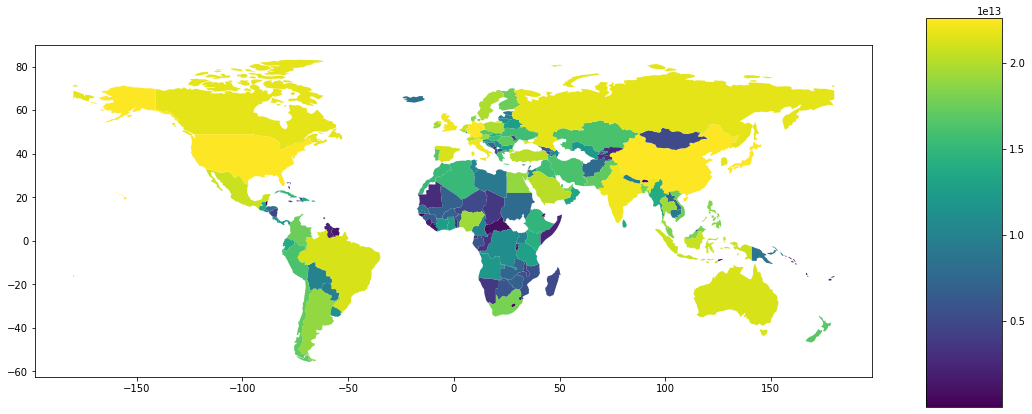

In [265]:
import matplotlib.pyplot as plt

# Plot the world with the 2020 gdp data
ax1 = to_plot.plot(column = '2020', cmap = 'viridis', figsize = (15, 9), scheme = 'quantiles', k = 50, legend = False)

# Min and max of gdp dataset
vmin = 48855550.2030142
vmax = 22605296107568.4

# add colorbar
fig = ax1.get_figure()
cax = fig.add_axes([0.95, 0.2, 0.07, 0.6])#cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm, cax=cax)

In [266]:
# MARKERS FOR COVID

# Create and clean a new df of gdp with country name and code, then merge with covid
newgdp = gdp_o[['Country Name', 'Code', '2020']]
newmerged = pd.merge(covid, newgdp, how = 'outer', on = 'Country Name', left_index = False, right_index = False, 
                 sort = True, copy = True)
newmerged = newmerged.dropna()

newmerged = newmerged.sort_values(by=['Code'])
newmerged = newmerged.reset_index(drop = True)

# Target columns of interest
newmerged = newmerged[['Code', 'Tot Cases/ 1M pop']]

# Create new df with merged geopandas world and covid data, clean
final_covid = pd.merge(world, newmerged, how = 'outer', left_on = 'iso_a3', right_on = 'Code', left_index = False, right_index = False, 
                 sort = True, copy = True)
final_covid = final_covid.dropna()
final_covid

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Code,Tot Cases/ 1M pop
5,3.412481e+07,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",AFG,4403.0
6,2.931027e+07,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",AGO,2860.0
7,3.047987e+06,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",ALB,95479.0
8,6.072475e+06,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",ARE,88511.0
9,4.429329e+07,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",ARG,197166.0
10,3.045191e+06,Asia,Armenia,ARM,26300.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",ARM,142173.0
14,2.323241e+07,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",AUS,199605.0
15,8.754413e+06,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",AUT,440123.0
16,9.961396e+06,Asia,Azerbaijan,AZE,167900.0,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",AZE,76911.0
17,1.146676e+07,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762...",BDI,3091.0


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

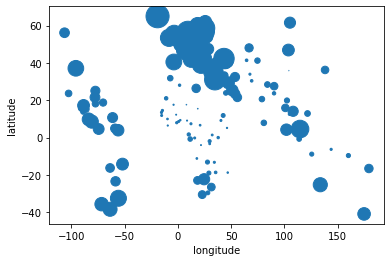

In [267]:
# Adding latitude and longitude to dataframe

# Read in lat and long data
lalo = pd.read_csv("country_data.csv")
lalo = lalo[['latitude', 'longitude', 'name']]

# Merge with gdp data and clean
lalo_codes = pd.merge(newgdp, lalo, how = 'outer', left_on = 'Country Name', right_on = 'name', left_index = False, right_index = False, 
                 sort = True, copy = True)
lalo_codes = lalo_codes.dropna()

# Take columns of interest
lalo_codes = lalo_codes[['Code', 'latitude', 'longitude']]
lalo_codes = lalo_codes.sort_values(by=['Code'])
lalo_codes = lalo_codes.reset_index(drop = True)

# Merge covid data, lat long data, and world geopandas data (also clean)
covid_lalo = pd.merge(world, lalo_codes, how = 'outer', left_on = 'iso_a3', right_on = 'Code', left_index = False, right_index = False, 
                 sort = True, copy = True)
covid_lalo = covid_lalo.dropna()

# Merge covid data, lat long data, world geopandas data, and gdp data
covid_lalo_size = pd.merge(covid_lalo, final_covid, how = 'outer', left_on = 'iso_a3', right_on = 'Code', left_index = False, right_index = False, 
                 sort = True, copy = True)

# Take columns of interest
covid_lalo_size = covid_lalo_size[['iso_a3_x', 'latitude', 'longitude', 'Tot Cases/ 1M pop', 'geometry_x']].copy()

# Add a new column with a calculated size for markers based on total cases / 1M population
covid_lalo_size['markers'] = covid_lalo_size['Tot Cases/ 1M pop'] * 0.001

# Create a scatter plot of this data on latitude and longitude
covid_lalo_size.plot(x = 'longitude', y = 'latitude', kind = 'scatter', s = covid_lalo_size['markers'])

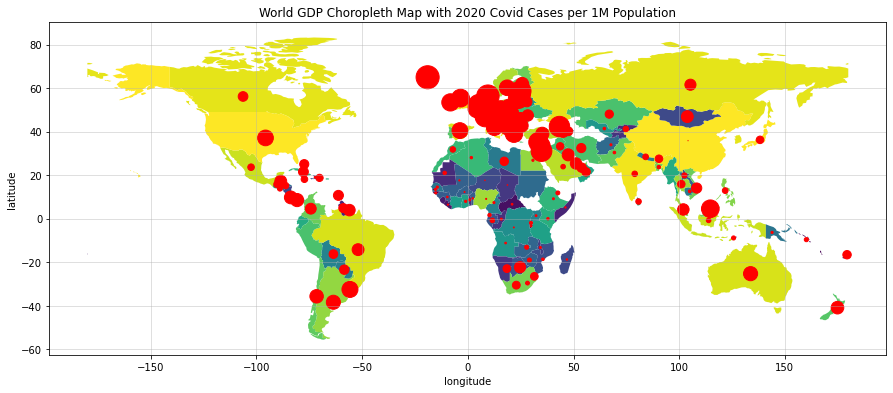

In [268]:
# initialize a figure and add a title
fig2, ax2 = plt.subplots(figsize = (15, 9))
plt.title("World GDP Choropleth Map with 2020 Covid Cases per 1M Population")

# plot map on axis

to_plot.plot(ax = ax2, column = '2020', cmap = 'viridis', figsize = (15, 9), scheme = 'quantiles', k = 50, legend = False)

# plot points
covid_lalo_size.plot(x = 'longitude', y = 'latitude', kind = 'scatter', s = covid_lalo_size['markers'], ax = ax2, color = 'red')

# add grid
ax2.grid(visible = True, alpha = 0.5)
plt.show()


References:
https://stackoverflow.com/questions/62661616/python-overlay-different-data-into-single-map

https://stackoverflow.com/questions/55368045/how-to-add-the-markersize-argument-to-a-dataframe-plot

https://geopandas.org/en/stable/gallery/plotting_basemap_background.html

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html

https://matplotlib.org/2.0.2/users/colormaps.html

https://geopandas.org/en/stable/docs/user_guide/mapping.html

https://medium.com/using-specialist-business-databases/creating-a-choropleth-map-using-geopandas-and-financial-data-c76419258746